In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, RepeatedStratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
column_names = [
    "Status_Checking_Acc", "Duration", "Credit_History", "Purpose",
    "Credit_Amount", "Savings_Account", "Employment_Since", "Installment_Rate",
    "Personal_Status_Sex", "Other_Debtors", "Residence_Since", "Property",
    "Age", "Other_Installment_Plans", "Housing", "Existing_Credits",
    "Job", "Liable_People", "Telephone", "Foreign_Worker",
    "Target"
]

# df = pd.read_csv("german.data-numeric", sep='\s+', header=None, names=column_names)

In [3]:
df = pd.read_csv("german.data", header=None, names = column_names, index_col=None, sep=" ")

In [4]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [5]:
df.head(10)

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,4,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,4,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,2,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,4,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,2,A123,28,A143,A152,2,A174,1,A191,A201,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_Checking_Acc      1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings_Account          1000 non-null   object
 6   Employment_Since         1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Since          1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

In [7]:
df.shape

(1000, 21)

In [8]:
df.isnull().sum()

Status_Checking_Acc        0
Duration                   0
Credit_History             0
Purpose                    0
Credit_Amount              0
Savings_Account            0
Employment_Since           0
Installment_Rate           0
Personal_Status_Sex        0
Other_Debtors              0
Residence_Since            0
Property                   0
Age                        0
Other_Installment_Plans    0
Housing                    0
Existing_Credits           0
Job                        0
Liable_People              0
Telephone                  0
Foreign_Worker             0
Target                     0
dtype: int64

In [9]:
df.describe()

,Duration,Credit_Amount,Installment_Rate,Residence_Since,Age,Existing_Credits,Liable_People,Target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [10]:
df.columns

Index(['Status_Checking_Acc', 'Duration', 'Credit_History', 'Purpose',
       'Credit_Amount', 'Savings_Account', 'Employment_Since',
       'Installment_Rate', 'Personal_Status_Sex', 'Other_Debtors',
       'Residence_Since', 'Property', 'Age', 'Other_Installment_Plans',
       'Housing', 'Existing_Credits', 'Job', 'Liable_People', 'Telephone',
       'Foreign_Worker', 'Target'],
      dtype='object')

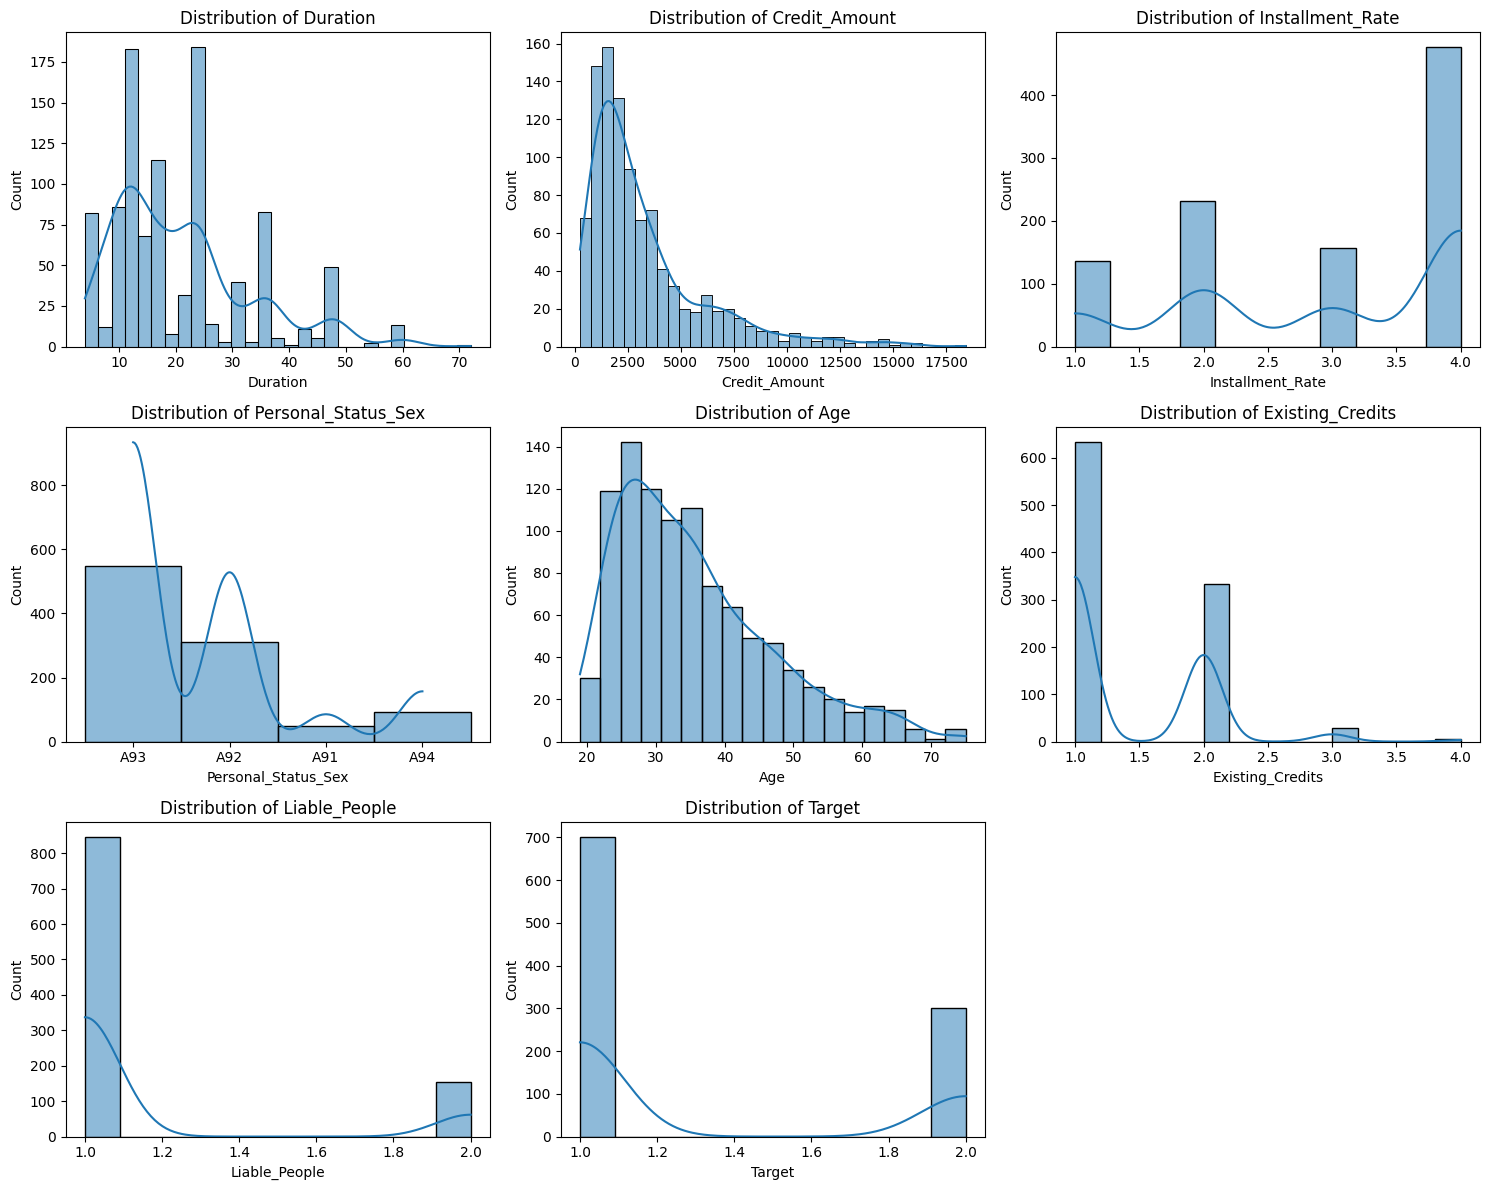

In [11]:
# List of numeric columns
numeric_cols = ['Duration', 'Credit_Amount', 'Installment_Rate', 'Personal_Status_Sex', 'Age', 'Existing_Credits', 'Liable_People', 'Target']

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i]).set(title=f'Distribution of {col}')

for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

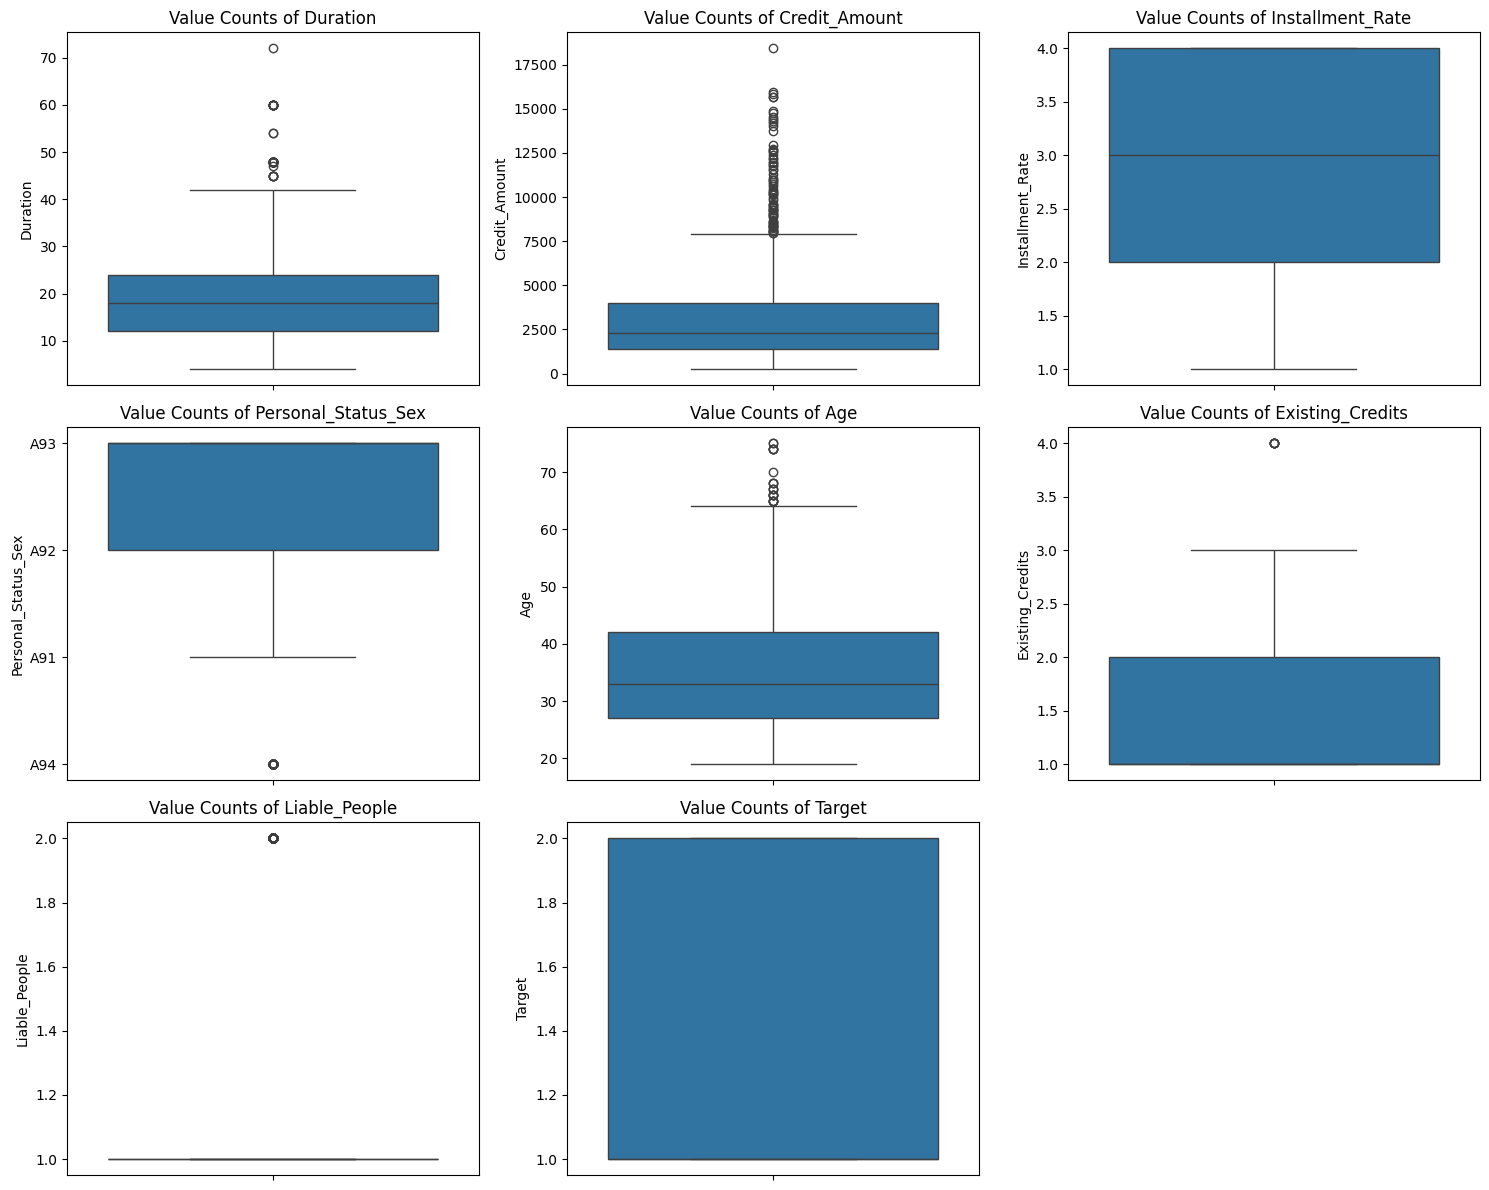

In [12]:
# List of numeric columns
numeric_cols = ['Duration', 'Credit_Amount', 'Installment_Rate', 'Personal_Status_Sex', 'Age', 'Existing_Credits', 'Liable_People', 'Target']

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f'Value Counts of {col}')

for ax in axes[len(numeric_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

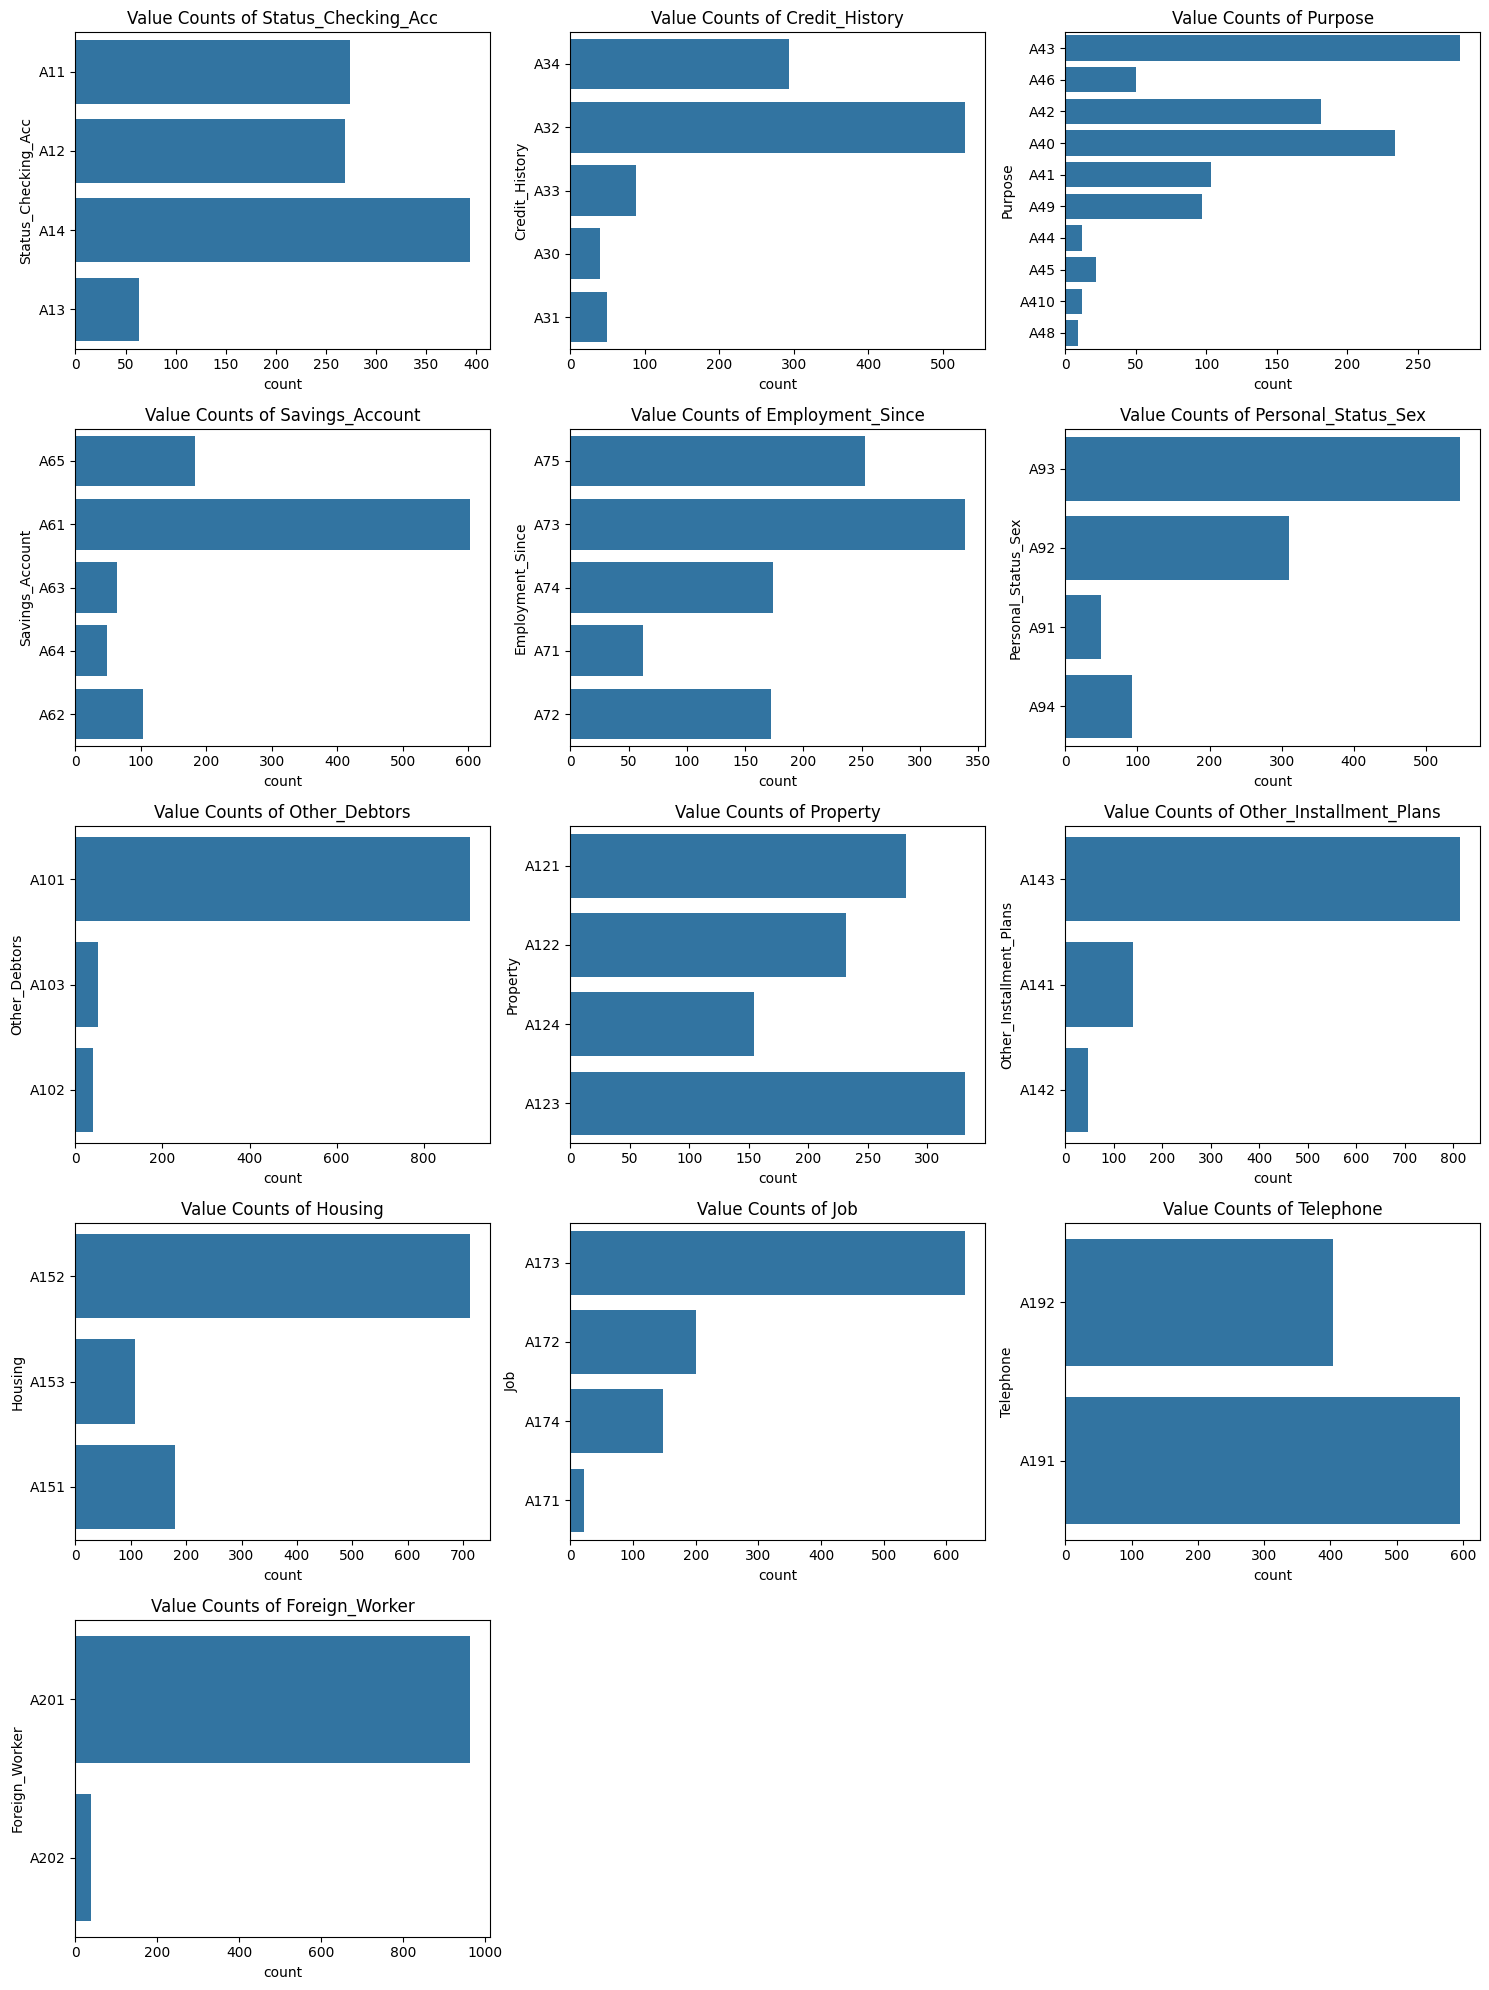

In [13]:
# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Value Counts of {col}')

for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

In [14]:
# create some new features
df['Credit_to_Duration_Ratio'] = df['Credit_Amount'] / df['Duration']

df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 50, 100], labels=['18-25', '26-35', '36-50', '50+'])

df['Installment_Category'] = pd.cut(df['Installment_Rate'], bins=[0, 2, 4], labels=['Low', 'High'])

df['Duration_Bucket'] = pd.cut(df['Duration'], bins=[0, 12, 24, 36, 60], labels=['Short', 'Medium', 'Long', 'Very Long'])

df.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Target,Credit_to_Duration_Ratio,Age_Group,Installment_Category,Duration_Bucket
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,194.833333,50+,High,Short
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,123.979167,18-25,Low,Very Long
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,174.666667,36-50,Low,Short
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,187.666667,36-50,Low,Very Long
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,202.916667,50+,High,Medium


In [15]:
df['Target'].value_counts()

Target
1    700
2    300
Name: count, dtype: int64

In [16]:
X = df.drop(columns=['Target'])
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
print(X_train.shape),
X_train.head()

(800, 24)


,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Credit_to_Duration_Ratio,Age_Group,Installment_Category,Duration_Bucket
912,A12,30,A32,A43,2991,A65,A75,2,A92,A101,4,A123,25,A143,A152,1,A173,1,A191,A201,99.700000,18-25,Low,Long
901,A14,20,A34,A40,3485,A65,A72,2,A91,A101,4,A121,44,A143,A152,2,A173,1,A192,A201,174.250000,36-50,Low,Medium
125,A11,12,A34,A40,2121,A61,A73,4,A93,A101,2,A122,30,A143,A152,2,A173,1,A191,A201,176.750000,26-35,High,Short
542,A11,30,A32,A42,6350,A65,A75,4,A93,A101,4,A122,31,A143,A152,1,A173,1,A191,A201,211.666667,26-35,High,Long
544,A14,12,A34,A40,1255,A61,A75,4,A93,A101,4,A121,61,A143,A152,2,A172,1,A191,A201,104.583333,50+,High,Short


In [18]:
cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_names),
    ('cat', OrdinalEncoder(), cat_names)
])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [19]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_transformed, y_train)

In [20]:
y_resampled.value_counts()

Target
1    561
2    561
Name: count, dtype: int64

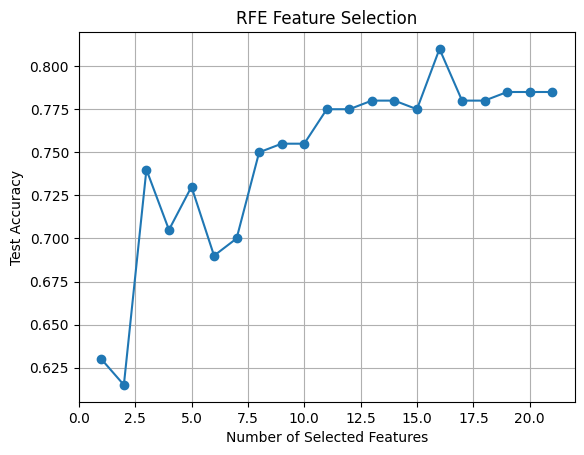

In [21]:
scores=[]
for n in range(1, X_resampled.shape[1]+1):
    RF = RandomForestClassifier(random_state=0)
    rfe = RFE(RF, n_features_to_select = n+1)
    rfe.fit(X_resampled, y_resampled)
    score = rfe.score(X_test_transformed,y_test)
    scores.append(score)

num_of_features = np.arange(1, X_resampled.shape[1]+1)
plt.plot(num_of_features, scores, marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("Test Accuracy")
plt.title("RFE Feature Selection")
plt.grid(True)
plt.show()

In [22]:
best_score = np.max(scores)
best_n_features = np.argmax(scores) + 1
print("✅ Best Score:", best_score)
print("✅ Best Number of Features:", best_n_features)

✅ Best Score: 0.81
✅ Best Number of Features: 16


In [23]:
final_rf = RandomForestClassifier(random_state=0)
rfe_final = RFE(final_rf, n_features_to_select=best_n_features)
rfe_final.fit(X_resampled, y_resampled)

X_resampled_selected = rfe_final.transform(X_resampled)
X_test_selected = rfe_final.transform(X_test_transformed)

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_resampled_selected, y_resampled)
y_pred = final_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print("🎯 Final Accuracy with top features:", accuracy)

🎯 Final Accuracy with top features: 0.77


In [24]:
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test_transformed)

accuracy_score(y_test, y_pred)

0.775

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df.drop(columns=['Target'])
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_names = list(X_train.select_dtypes('object').columns)
num_names = list(X_train.select_dtypes(['float', 'int']).columns)

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), num_names),
    ('cat', OrdinalEncoder(), cat_names)
])

base_clf = RandomForestClassifier(random_state=42)

pipeline = ImbPipeline(steps=[
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=2)),
    ('rfe', RFE(estimator=base_clf, n_features_to_select=18)),
    ('classifier', base_clf)
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [5, 10],
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Accuracy Score: 0.79
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.88      0.86       141
           2       0.67      0.58      0.62        59

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.78      0.79      0.79       200



In [26]:
import joblib

joblib.dump(grid_search.best_estimator_, 'credit_model_pipeline.pkl')

print("✅ Model pipeline saved successfully as 'credit_model_pipeline.pkl'")

✅ Model pipeline saved successfully as 'credit_model_pipeline.pkl'


In [27]:
for fea in list(cat_names):
    print(df[fea].value_counts())

Status_Checking_Acc
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64
Credit_History
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64
Purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64
Savings_Account
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64
Employment_Since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64
Personal_Status_Sex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64
Other_Debtors
A101    907
A103     52
A102     41
Name: count, dtype: int64
Property
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64
Other_Installment_Plans
A143    814
A141    139
A142     47
Name: count, dtype: int64
Housing
A152    713
A151    179
A153    108
Name: count, dtype: int64
Job
A173    630
A172    200
A174    148
A171     22
Name: co

In [28]:
df.head()

,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors,Residence_Since,Property,Age,Other_Installment_Plans,Housing,Existing_Credits,Job,Liable_People,Telephone,Foreign_Worker,Target,Credit_to_Duration_Ratio,Age_Group,Installment_Category,Duration_Bucket
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,194.833333,50+,High,Short
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,123.979167,18-25,Low,Very Long
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,174.666667,36-50,Low,Short
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,187.666667,36-50,Low,Very Long
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,202.916667,50+,High,Medium
